데이터 로딩 및 Feature 추출

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# 1) 데이터 로드
data   = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/boston_house_data.xlsx')
target = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/boston_house_target.xlsx')

# 2) 불필요한 인덱스 열 제거 (있다면)
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])
if 'Unnamed: 0' in target.columns:
    target = target.drop(columns=['Unnamed: 0'])

# 3) X: 데이터의 마지막 열
X = data.iloc[:, -1].values.reshape(-1, 1)

# 4) y: 가격 정보가 담긴 단일 열 선택
#    여기서는 target의 첫(그리고 유일한) 숫자 컬럼(컬럼명 0)을 사용
y = target.iloc[:, 0].values  # shape → (506,)

# 5) 학습/테스트 분할 (70% : 30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 6) 결과 확인
print("X_train shape:", X_train.shape)  # (354, 1)
print("X_test  shape:", X_test.shape)   # (152, 1)
print("y_train shape:", y_train.shape)  # (354,)
print("y_test  shape:", y_test.shape)   # (152,)




X_train shape: (354, 1)
X_test  shape: (152, 1)
y_train shape: (354,)
y_test  shape: (152,)


선형 회귀 모델 구성(경사하강법)

경사하강법 학습 완료 → w1 = -0.8027, w0 = 32.2441


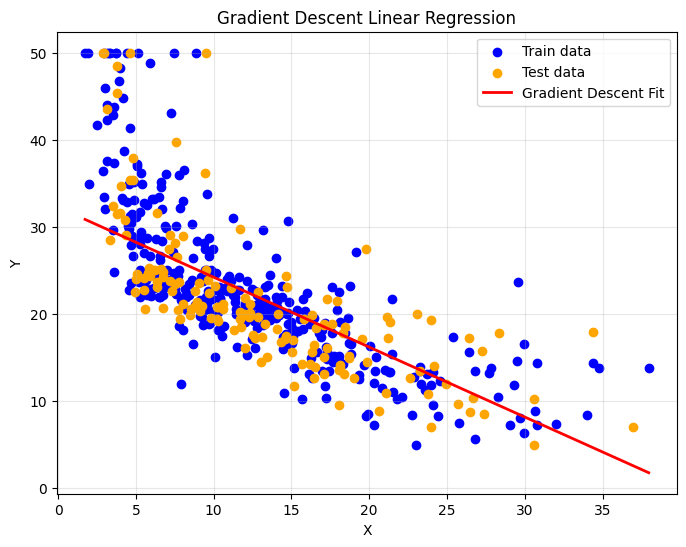

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -- 경사하강법으로 선형 회귀 모델 학습 --
# 1D 배열로 변환
X_flat = X_train.flatten()   # shape: (n_train,)
y_flat = y_train             # shape: (n_train,)
m      = float(len(X_flat))

# 파라미터 초기화
w1, w0   = 0.0, 0.0
lr       = 0.001     # 학습률
epochs   = 10000    # 반복 횟수

# 경사하강법 수행
for epoch in range(epochs):
    y_pred = w1 * X_flat + w0
    error  = y_pred - y_flat
    dw1    = (1/m) * np.dot(error, X_flat)  # ∑(error * x)
    dw0    = (1/m) * np.sum(error)          # ∑(error)
    w1    -= lr * dw1
    w0    -= lr * dw0

print(f"경사하강법 학습 완료 → w1 = {w1:.4f}, w0 = {w0:.4f}")

# -- 학습 데이터 & 테스트 데이터 시각화 --
plt.figure(figsize=(8,6))
# Training data
plt.scatter(X_train, y_train, c='blue',  marker='o', label='Train data')
# Test data
plt.scatter(X_test,  y_test,  c='orange', marker='o', label='Test data')

# 회귀선
x_vals = np.linspace(min(X.flatten()), max(X.flatten()), 100)
plt.plot(x_vals, w1 * x_vals + w0, 'r-', linewidth=2, label='Gradient Descent Fit')

# 그래프 꾸미기
plt.title('Gradient Descent Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(alpha=0.3)
plt.show()





선형 회귀 모델 구성(scikit-learn)

Scikit-learn 학습 완료 → intercept = 35.2656, coef = -0.9862


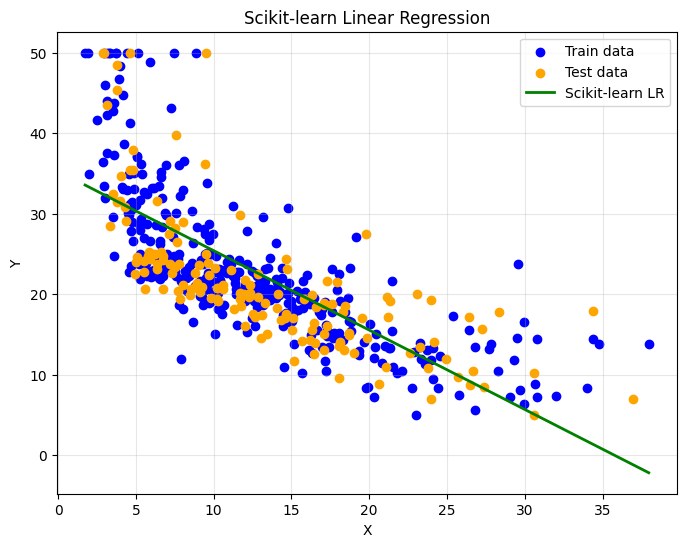

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# -- scikit-learn LinearRegression 모델 학습 --
model = LinearRegression()
model.fit(X_train, y_train)
intercept = model.intercept_
coef      = model.coef_[0]
print(f"Scikit-learn 학습 완료 → intercept = {intercept:.4f}, coef = {coef:.4f}")

# -- 학습/테스트 데이터 시각화 --
plt.figure(figsize=(8,6))
# Training data
plt.scatter(X_train, y_train, c='blue',  marker='o', label='Train data')
# Test data
plt.scatter(X_test,  y_test,  c='orange', marker='o', label='Test data')

# 회귀선 (scikit-learn)
x_vals = np.linspace(min(X.flatten()), max(X.flatten()), 100).reshape(-1,1)
y_vals = model.predict(x_vals)
plt.plot(x_vals, y_vals, color='green', linewidth=2, label='Scikit-learn LR')

# 그래프 꾸미기
plt.title('Scikit-learn Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


비선형(2-4차) 회귀 모델 구성(경사하강법)

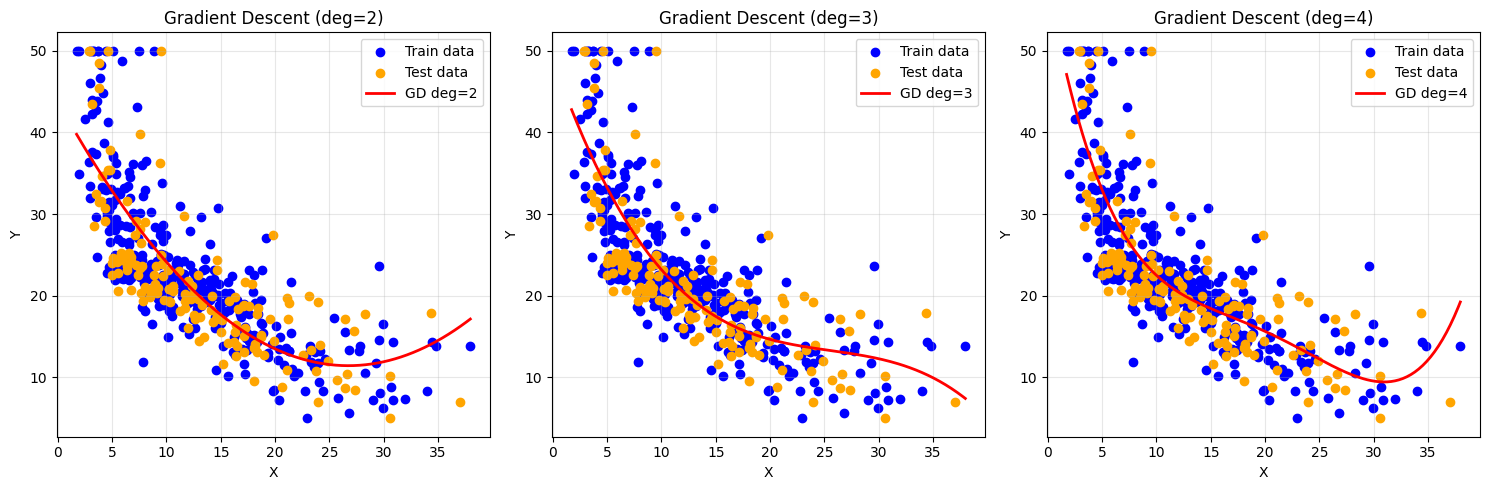

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# -- 1) 원본 X_train, y_train 준비 (shape: (n,1), (n,))
X_flat = X_train.flatten()
y_flat = y_train

# -- 2) 피처 스케일링 (Standardization) --
mu    = X_flat.mean()
sigma = X_flat.std()
Xs    = (X_flat - mu) / sigma   # 스케일된 학습용 X
m     = float(len(Xs))

# -- 3) 파라미터 및 학습 설정 --
degrees = [2, 3, 4]
lr       = 0.001      # 학습률을 더 작게
epochs   = 10000      # 반복 횟수

plt.figure(figsize=(15,5))

for idx, deg in enumerate(degrees):
    # 디자인 행렬 (스케일된 X)
    Phi = np.vstack([Xs**k for k in range(deg+1)]).T  # (n, deg+1)

    # w 초기화
    w = np.zeros(deg+1)

    # 경사하강법
    for _ in range(epochs):
        y_pred = Phi @ w             # (n,)
        error  = y_pred - y_flat     # (n,)
        grad   = (2/m) * (Phi.T @ error)  # (deg+1,)
        w     -= lr * grad

    # -- 시각화 --
    ax = plt.subplot(1, 3, idx+1)
    # (1) Train/Test Data
    ax.scatter(X_train, y_train, c='blue',  marker='o', label='Train data')
    ax.scatter(X_test,  y_test,  c='orange', marker='o', label='Test data')

    # (2) 회귀선: unscale한 x 축 값 사용
    x_plot   = np.linspace(X_train.min(), X_train.max(), 200)
    xs_plot  = (x_plot - mu) / sigma
    Phi_plot = np.vstack([xs_plot**k for k in range(deg+1)]).T
    y_plot   = Phi_plot @ w
    ax.plot(x_plot, y_plot, 'r', linewidth=2, label=f'GD deg={deg}')

    ax.set_title(f'Gradient Descent (deg={deg})')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


비선형(2-4차) 회귀 모델 구성(scikit-learn)

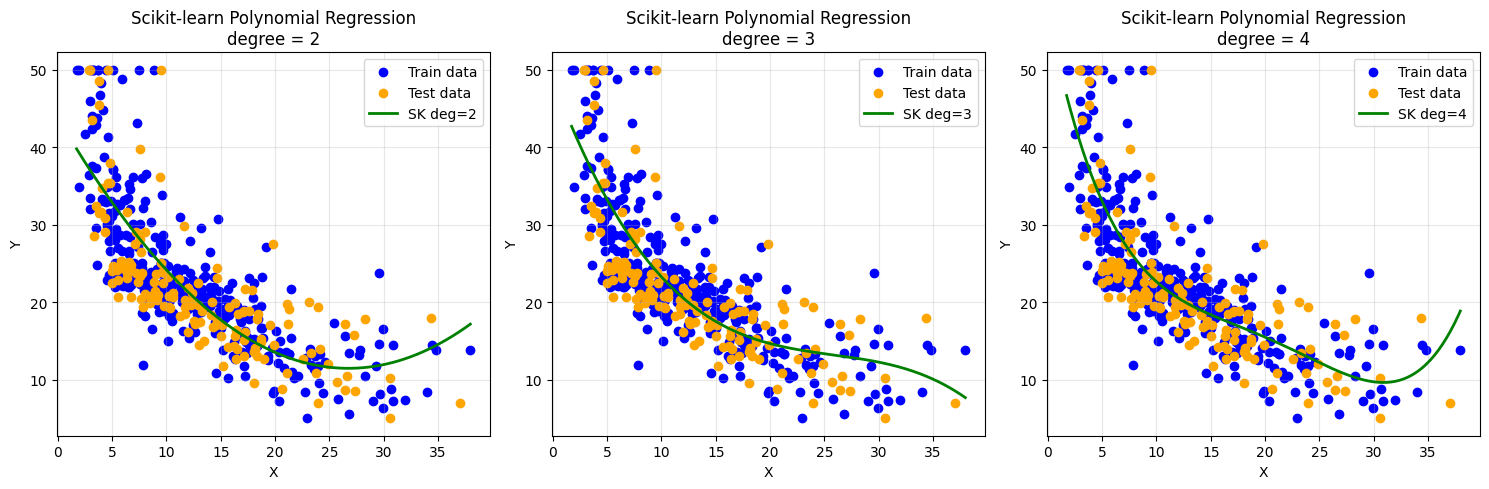

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# -- scikit-learn을 이용한 다항(2~4차) 회귀 학습 및 시각화 --
degrees = [2, 3, 4]

plt.figure(figsize=(15, 5))
for idx, deg in enumerate(degrees):
    # 1) 다항 특성 생성
    poly = PolynomialFeatures(degree=deg, include_bias=True)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly  = poly.transform(X_test)

    # 2) LinearRegression 모델 학습
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # 3) 서브플롯 설정
    ax = plt.subplot(1, 3, idx + 1)
    # Training data
    ax.scatter(X_train, y_train, c='blue',  marker='o', label='Train data')
    # Test data
    ax.scatter(X_test,  y_test,  c='orange', marker='o', label='Test data')

    # 4) 예측 곡선
    x_plot = np.linspace(X_train.min(), X_train.max(), 200).reshape(-1, 1)
    X_plot_poly = poly.transform(x_plot)
    y_plot = model.predict(X_plot_poly)
    ax.plot(x_plot, y_plot, 'g', linewidth=2, label=f'SK deg={deg}')

    # 5) 그래프 꾸미기
    ax.set_title(f'Scikit-learn Polynomial Regression\ndegree = {deg}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


테스트 데이터를 사용해서 모델의 정확도 평가

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

degrees = [1, 2, 3, 4]

for deg in degrees:
    # 1) 데이터 변환
    if deg == 1:
        # 선형 회귀: 원래 X 사용
        X_train_mod = X_train
        X_test_mod  = X_test
    else:
        # 다항 회귀: PolynomialFeatures로 확장
        poly = PolynomialFeatures(degree=deg, include_bias=True)
        X_train_mod = poly.fit_transform(X_train)
        X_test_mod  = poly.transform(X_test)

    # 2) 모델 학습
    model = LinearRegression()
    model.fit(X_train_mod, y_train)

    # 3) 테스트 데이터 예측
    y_pred = model.predict(X_test_mod)

    # 4) 평가 지표 계산
    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)

    # 5) 결과 출력
    kind = "Linear" if deg == 1 else f"Poly(deg={deg})"
    print(f"{kind:10s} → MSE: {mse:.4f},  R²: {r2:.4f}")


Linear     → MSE: 38.0987,  R²: 0.4887
Poly(deg=2) → MSE: 31.5796,  R²: 0.5762
Poly(deg=3) → MSE: 29.3701,  R²: 0.6058
Poly(deg=4) → MSE: 28.2854,  R²: 0.6204
